In [ ]:
import os
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from time import time
import tensorflow_hub as hub
import tensorflow as tf

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#thudersvm

In [ ]:
import numpy as np 

In [ ]:
! pip install thundersvm

     |████████████████████████████████| 512kB 5.9MB/s 


In [ ]:
!git clone https://github.com/Xtra-Computing/thundersvm.git


Cloning into 'thundersvm'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 7077 (delta 32), reused 40 (delta 18), pack-reused 6991
Receiving objects: 100% (7077/7077), 4.79 MiB | 3.90 MiB/s, done.
Resolving deltas: 100% (4762/4762), done.


In [ ]:
cd thundersvm


/content/thundersvm


In [ ]:
mkdir build && cd build && cmake .. && make -j

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - found
-- Found Threads: TRUE  
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenM

In [ ]:
pwd

'/content/thundersvm'

In [ ]:
cd python 

/content/thundersvm/python


In [ ]:
ls

README.md  setup.py  svm.py  thundersvm/


In [ ]:
from svm import *

In [ ]:
pwd

'/content/thundersvm/python'

In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating thundersvm.egg-info
writing thundersvm.egg-info/PKG-INFO
writing dependency_links to thundersvm.egg-info/dependency_links.txt
writing requirements to thundersvm.egg-info/requires.txt
writing top-level names to thundersvm.egg-info/top_level.txt
writing manifest file 'thundersvm.egg-info/SOURCES.txt'
writing manifest file 'thundersvm.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/thundersvm
copying thundersvm/thundersvm.py -> build/lib/thundersvm
copying thundersvm/__init__.py -> build/lib/thundersvm
copying thundersvm/libthundersvm.so -> build/lib/thundersvm
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/thundersvm
copying build/lib/thundersvm/libthundersvm.so -> build/bdist.linux-x86_64/egg/thundersvm
copying build/lib/thundersvm/thundersvm.py ->

In [ ]:
from thundersvm import SVC

In [ ]:
SVC()

SVC(C=1.0, cache_size=None, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', gpu_id=0,
    kernel='rbf', max_iter=-1, max_mem_size=-1, n_jobs=-1, probability=False,
    random_state=None, shrinking=False, tol=0.001, verbose=False)

## Enter Dataset And Preprocess

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,RegexpTokenizer
from bs4 import BeautifulSoup
from string import punctuation
import re,string,unicodedata
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.environ['KAGGLE_USERNAME'] = "shreyanshgupta" # username from the json file
os.environ['KAGGLE_KEY'] = "53c4292282781654b84c32cbb8cb1ea0" # key from the json file
!kaggle datasets download -d mdepak/fakenewsnet

 30% 5.00M/16.6M [00:01<00:03, 3.58MB/s]
100% 16.6M/16.6M [00:01<00:00, 11.5MB/s]


In [ ]:
!unzip 'fakenewsnet.zip'

Archive:  fakenewsnet.zip
  inflating: BuzzFeedNews.txt        
  inflating: BuzzFeedNewsUser.txt    
  inflating: BuzzFeedUser.txt        
  inflating: BuzzFeedUserFeature.mat  
  inflating: BuzzFeedUserUser.txt    
  inflating: BuzzFeed_fake_news_content.csv  
  inflating: BuzzFeed_real_news_content.csv  
  inflating: PolitiFactNews.txt      
  inflating: PolitiFactNewsUser.txt  
  inflating: PolitiFactUser.txt      
  inflating: PolitiFactUserFeature.mat  
  inflating: PolitiFactUserUser.txt  
  inflating: PolitiFact_fake_news_content.csv  
  inflating: PolitiFact_real_news_content.csv  


In [ ]:
dfF = pd.read_csv("/content/BuzzFeed_fake_news_content.csv")

In [ ]:
dfR = pd.read_csv("/content/BuzzFeed_real_news_content.csv")

In [ ]:
dfF.columns

Index(['id', 'title', 'text', 'url', 'top_img', 'authors', 'source',
       'publish_date', 'movies', 'images', 'canonical_link', 'meta_data'],
      dtype='object')

In [ ]:
dfF.drop(columns=['id', 'url', 'top_img', 'authors', 'source',
       'publish_date', 'movies', 'images', 'canonical_link', 'meta_data'], inplace=True)

In [ ]:
dfF['labels'] = 0
dfF

,title,text,labels
0,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,0
1,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,0
2,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,0
3,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",0
4,Website is Down For Maintenance,Website is Down For Maintenance,0
...,...,...,...
86,Hillary’s TOP Donor Country Just Auctioned Off...,Hillary’s TOP Donor Country Just Auctioned Off...,0
87,Cavuto Just Exposed Lester Holt's Lies During ...,Advertisement - story continues below\n\nThe f...,0
88,"The AP, In 2004, Said Your Boy Obama Was BORN ...",Well THAT’S Weird. If the Birther movement is ...,0
89,People Noticed Something Odd About Hillary's O...,\n\nThere’s a lot to be discussed about last n...,0


In [ ]:
dfR.columns

Index(['id', 'title', 'text', 'url', 'top_img', 'authors', 'source',
       'publish_date', 'movies', 'images', 'canonical_link', 'meta_data'],
      dtype='object')

In [ ]:
dfR.drop(columns=['id', 'url', 'top_img', 'authors', 'source',
       'publish_date', 'movies', 'images', 'canonical_link', 'meta_data'], inplace=True)

In [ ]:
dfR['labels'] = 1
dfR

,title,text,labels
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",1
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,1
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",1
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,1
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,1
...,...,...,...
86,It’s “Trump is HITLER” Month at the Washington...,"Like much of the mainstream media, the Washing...",1
87,Obama’s team isn’t laughing at Trump anymore,2016 Obama’s team isn’t laughing at Trump anym...,1
88,"Georgia poll: Donald Trump, Hillary Clinton in...","Story highlights Trump has 45%, Clinton 42% an...",1
89,Chelsea Handler Gets The Last Word After RNC C...,There may be a few women out there who enjoy a...,1


In [ ]:
frame = [dfR,dfF]
df = pd.concat(frame)
df

,title,text,labels
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",1
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,1
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",1
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,1
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,1
...,...,...,...
86,Hillary’s TOP Donor Country Just Auctioned Off...,Hillary’s TOP Donor Country Just Auctioned Off...,0
87,Cavuto Just Exposed Lester Holt's Lies During ...,Advertisement - story continues below\n\nThe f...,0
88,"The AP, In 2004, Said Your Boy Obama Was BORN ...",Well THAT’S Weird. If the Birther movement is ...,0
89,People Noticed Something Odd About Hillary's O...,\n\nThere’s a lot to be discussed about last n...,0


In [ ]:
df.text = df.title + ' ' + df.text
df.drop(columns='title', inplace=True)

In [ ]:
df

,text,labels
0,Another Terrorist Attack in NYC…Why Are we STI...,1
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",1
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...",1
3,Trump vs. Clinton: A Fundamental Clash over Ho...,1
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",1
...,...,...
86,Hillary’s TOP Donor Country Just Auctioned Off...,0
87,Cavuto Just Exposed Lester Holt's Lies During ...,0
88,"The AP, In 2004, Said Your Boy Obama Was BORN ...",0
89,People Noticed Something Odd About Hillary's O...,0


In [ ]:
df.isna().sum()

text      0
labels    0
dtype: int64

In [ ]:
import random

In [ ]:
df = df.sample(frac=1)

In [ ]:
df

,text,labels
25,NYC Terrorist Ahmad Rahami Sued Police Departm...,0
54,Kaine visits site of Orlando mass shooting Tim...,1
78,Obama: “I bet when I die you’ll be happy to pe...,0
18,One Critically Wounded As Charlotte Police End...,1
42,Tebow DISMANTLES national anthem protests in o...,0
...,...,...
85,The Mystery of Trump’s Man in Moscow: Carter P...,1
46,Trump labels Clinton 'weak and ineffective' in...,1
8,Jeb Bush to lecture at Harvard this fall Story...,1
26,NC State Troopers Take A Knee Before Protectin...,1


In [ ]:
df.reset_index(inplace=True,drop=True)
df

,text,labels
0,NYC Terrorist Ahmad Rahami Sued Police Departm...,0
1,Kaine visits site of Orlando mass shooting Tim...,1
2,Obama: “I bet when I die you’ll be happy to pe...,0
3,One Critically Wounded As Charlotte Police End...,1
4,Tebow DISMANTLES national anthem protests in o...,0
...,...,...
177,The Mystery of Trump’s Man in Moscow: Carter P...,1
178,Trump labels Clinton 'weak and ineffective' in...,1
179,Jeb Bush to lecture at Harvard this fall Story...,1
180,NC State Troopers Take A Knee Before Protectin...,1


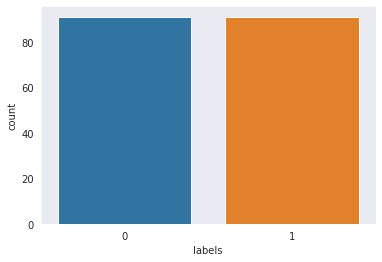

In [ ]:
sns.set_style('dark')
sns.countplot(df.labels)

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = set(stopwords.words('english'))
stop.remove('not')
stop.remove('no')
stop.update(string.punctuation)

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
def remhtml(text):
  soup = BeautifulSoup(text,"html.parser")
  return soup.get_text()

def rem_bw_sq_bracks(text):
  return re.sub('\[[^]]*\]','',text)

def remhttplink(text):
  return re.sub(r'http\S+','',text)

def remhttpAT(text):
  return re.sub(r'@','',text)

def remstopwords(text):
  snw = SnowballStemmer('english')
  word_list = tokenizer.tokenize(text)
  clean_list = [w for w in word_list if w not in stop]
  clean_text = ' '.join(clean_list)
  return clean_text

def clean_sent(text):
  text = remhtml(text)
  text = rem_bw_sq_bracks(text)
  text = remhttplink(text)
  text = remstopwords(text)
  return text

df['text'] = df['text'].apply(clean_sent)

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
def pos_tags(text):
    text = text.split()
    non_stop = [word for word in text if word not in stopwords.words("english")]
    pos = [part[1] for part in nltk.pos_tag(non_stop)]
    pos = " ".join(pos)
    return pos

In [ ]:
starting = time()
df['pos'] = df['text'].apply(pos_tags)
print(round((time()-starting)/60,2))

0.16


In [ ]:
xData_text = df.text.values
xData_pos = df.pos.values
yData = df.labels.values

In [ ]:
xData_pos = xData_pos.astype('str')
xData_text = xData_text.astype('str')
yData=yData.astype('int')
yData = yData.reshape((-1,1))

## Feature Extraction, Feature Selection and Classifiers



In [ ]:
from keras.preprocessing.text import text_to_word_sequence
from gensim.models.doc2vec import Doc2Vec,TaggedDocument
from gensim.models import Word2Vec,KeyedVectors
from gensim import utils
from time import time
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,log_loss,f1_score, precision_score, recall_score

In [ ]:
def posTagsVectorize(posTags):
  st = time()
  cv = CountVectorizer()
  posTagged = cv.fit_transform(posTags).toarray()
  en = time()
  print(f"POS Tags Completed:{round((st-en)/60,2)}")
  return posTagged

In [ ]:
# Word2Vec
def word2VecScratch(textData):
  # Convert Words to sequence
  seqData = [text_to_word_sequence(i) for i in textData]
  # Define and Train the model
  print("Word2Vec Training Start")
  model = Word2Vec(seqData,size=100,window=5,cbow_mean=1)
  model.save("./word2vecEmbed.model")
  trainedVectors = KeyedVectors.load("./word2vecEmbed.model")
  print("Word2Vec Model Loaded")
  # Prepare words acc count values
  w2v = dict()
  for item in trainedVectors.wv.vocab:
    w2v[item] = trainedVectors.wv.vocab[item].count
  # Sort the words according to the count and only pick most frequent words
  w2vSorted=dict(sorted(w2v.items(), key=lambda x: x[1],reverse=True))
  keys = w2vSorted.keys()
  keys_list = [i for i in keys]
  keys = np.array(keys_list)
  print(f"Total words are: {keys.shape}")
  # Prepare embedding map
  embeddings = {}
  for key in keys:
    embeddings[key] = trainedVectors[key]
  print("Embeddings Prepared")
  return embeddings

def word2VecVectorize(sentence, embeddingMapW2V):
  words = sentence.split()
  if len(words)==0:
    return np.zeros((100,))
  avg = np.zeros((100,))
  total = 0
  for w in words:
    try:
      total += embeddingMapW2V[w]
    except:
      total += np.zeros((100,))
  
  avg = total/len(words)
  return avg

def mainWord2Vec(textData):
  embeddingMap = word2VecScratch(textData)
  vectorizedData = np.array([word2VecVectorize(i,embeddingMap) for i in textData])
  print("Done")
  return vectorizedData

In [ ]:
# Doc2Vec
max_epochs = 100
vec_size = 100
alpha = 0.025

def tagData(textData):
  # Convert Words to sequence and creating a tagged document
  taggedData = [TaggedDocument(words=text_to_word_sequence(_d.lower()),
                                tags=[str(i)]) for i, _d in enumerate(textData)]
  return taggedData

def defineAndTrainModel(tagged_data):
  model = Doc2Vec(size=vec_size,
                  alpha=alpha, 
                  min_alpha=0.00025,
                  min_count=1,
                  dm =1)

  model.build_vocab(tagged_data)
  for epoch in range(max_epochs):
    # print('iteration {0}'.format(epoch))
    model.train(tagged_data,
    total_examples=model.corpus_count,
    epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha
    model.save("./doc2vec.model")
    # print("Model Saved")

def cvtText2Vec():
  model= Doc2Vec.load("./doc2vec.model")
  vectorizedText = model.docvecs.vectors_docs
  return vectorizedText

def mainDoc2Vec(textData):
  taggedData = tagData(textData)
  defineAndTrainModel(taggedData)
  vectorizedText = cvtText2Vec()
  return vectorizedText

In [ ]:
# Sentence Embedding
def embed(textData):
  module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
  model = hub.load(module_url)
  print ("module %s loaded" % module_url)
  return model(textData)

In [ ]:
# TFIDF
def basicTfidf(textData):
  tfidf = TfidfVectorizer(lowercase=False,max_features=1000)
  vectorizedData = tfidf.fit_transform(xData_text).toarray()
  return vectorizedData

In [ ]:
def formTrainingData(vectorizedText, vectorizedTags):
  xDataFinal = np.hstack((vectorizedText, vectorizedTags))
  return xDataFinal

In [ ]:
def vectorizeAndSave(textData, posTags, model, fileName, dataName):
  posTagV = posTagsVectorize(posTags)
  xFVec = model(textData)
  xData = np.hstack((xFVec,posTagV))
  dataset = np.hstack((xData, yData))
  if not os.path.exists("/content/"+dataName):
    os.mkdir("/content/"+dataName)
  print(dataset.shape)
  np.save('/content/'+dataName+'/'+fileName+'.npy', dataset)

In [ ]:
vectorizeAndSave(xData_text, xData_pos, basicTfidf, "buzzfeedTfidf", "Buzzfeed")

POS Tags Completed:-0.0
(182, 1032)


In [ ]:
vectorizeAndSave(xData_text, xData_pos, mainDoc2Vec, "buzzfeedDocTVec", "Buzzfeed")

POS Tags Completed:-0.0
(182, 132)


In [ ]:
vectorizeAndSave(xData_text, xData_pos, embed, "buzzfeedSentEmbed","Buzzfeed")

POS Tags Completed:-0.0
module https://tfhub.dev/google/universal-sentence-encoder/4 loaded
(182, 544)


In [ ]:
vectorizeAndSave(xData_text, xData_pos, mainWord2Vec, "buzzfeedWord2Vec","Buzzfeed")

POS Tags Completed:-0.0
Word2Vec Training Start
Word2Vec Model Loaded
Total words are: (2429,)
Embeddings Prepared
Done
(182, 132)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
import random

In [ ]:
# Load the array
dataset = np.load("/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar2/liarDocTVec.npy")
dataset.shape

(12791, 134)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset[:,:-1], dataset[:,-1], test_size=0.25, stratify=dataset[:,-1])

In [ ]:
lr = LogisticRegression(max_iter=150)

In [ ]:
sv = SVC(max_iter=200)

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=101)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(x_test,y_test)

0.590368980612883

#PSO GA V3


In [ ]:
def reduceFeature(solution, feats):
    selectedElementIdx = np.where(solution == 1)[0]
    reducedFeatures = feats[:, selectedElementIdx]
    return reducedFeatures

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
np.random.seed(42)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))


class PSO:
    def __init__(self, size, popu_size, model, maxEpoch=100, maxV=4, minV=-4, stopE=35, particles_init=None):
        self.size = size
        if particles_init is not None:
            self.particles = particles_init
        else:
            self.particles = np.random.randint(2, size=(popu_size, self.size))
        self.maxEarlyStop = stopE
        self.maxEpochs = maxEpoch
        self.maxVelocity = maxV
        self.minVelocity = minV
        self.popuSize = popu_size
        self.velocity = np.random.rand(popu_size, self.size)
        self.pbest = np.zeros((popu_size, self.size))
        self.pbestScore = np.zeros((popu_size,), dtype=float)
        self.model = model
        self.gbestScore = 0
        self.gbest = np.ones((self.size,), dtype=float)
        self.gbestPopu = np.ones((popu_size, self.size))

    def checkFitness(self, trainFeatures, valFeatures, trainLabels, valLabels):
        bestItr = np.zeros((self.size,))
        bestItrScore = 0
        for i in range(self.popuSize):
            reducedFeaturesTrain = reduceFeature(self.particles[i], trainFeatures)
            reducedFeaturesVal = reduceFeature(self.particles[i], valFeatures)
            self.model.fit(reducedFeaturesTrain, trainLabels)
            score = self.model.score(reducedFeaturesVal, valLabels)

            if score > self.pbestScore[i]:
                self.pbestScore[i] = score
                self.pbest[i] = self.particles[i]

            if score > self.gbestScore:
                self.gbestScore = score
                self.gbest = self.pbest[i]
                self.gbestPopu = self.pbest

            if score > bestItrScore:
                bestItrScore = score
                bestItr = self.particles[i]

        return bestItr, bestItrScore

    def updateParticles(self, itr, bestItr):
        wmax = 1.0
        wmin = 0.6
        kmin = 1.5
        kmax = 4.0
        w = wmax - (itr / self.maxEpochs) * (wmax - wmin)
        k = kmin + (itr / self.maxEpochs) * (kmax - kmin)
        for i in range(self.popuSize):
            self.velocity[i] = w * self.velocity[i] + k * np.random.rand() * (self.pbest[i] - self.particles[i]) + \
                               k * np.random.rand() * (self.gbest - self.particles[i]) + \
                               k * np.random.rand() * (bestItr - self.particles[i])

            for j in range(self.size):
                if self.velocity[i][j] > self.maxVelocity:
                    self.velocity[i][j] = self.maxVelocity
                elif self.velocity[i][j] < self.minVelocity:
                    self.velocity[i][j] = self.minVelocity

            veloSig = sigmoid(self.velocity[i])
            for j in range(self.size):
                self.particles[i][j] = (np.random.rand() < veloSig[j]) * 1

    def logging(self, allScores):
        print("Best Score ", self.gbestScore)
        print("Best Features: ", self.gbest)
        gbest_indices = np.where(self.gbest == 1)[0]
        gbest_num_elements = gbest_indices.shape[0]
        print("Indices Selected: ", gbest_indices)
        print("Total Elements Selected: ", gbest_num_elements)
        plt.plot(allScores, )
        plt.show()
      
    def saveLog(self, path):
      if not os.path.exists(path+"/"+ type(self.model).__name__):
        os.mkdir(path+"/"+ type(model).__name__)
      np.save(path+"/"+ type(self.model).__name__ + "/populationPSO.npy", self.particles)
      np.save(path+"/"+ type(self.model).__name__ + "/velocityPSO.npy", self.velocity)
      np.save(path+"/"+ type(self.model).__name__ + "/personalBestPSO.npy", self.pbest)
      np.save(path+"/"+ type(self.model).__name__ + "/globalBestPSO.npy", self.gbest)
      np.save(path+"/"+ type(self.model).__name__ + "/globalBestPopulationPSO.npy", self.gbestPopu)
      return

    def mainPso(self, trainFeatures, valFeatures, trainLabels, valLabels, path):
        allScores = []
        epoch = 0
        earlyStop = 0
        while epoch < self.maxEpochs:
            start = time()
            print(f"Epochs: {epoch + 1}/{self.maxEpochs}")
            bestItr, bestItrScore = self.checkFitness(trainFeatures, valFeatures, trainLabels, valLabels)
            self.updateParticles(itr=epoch, bestItr=bestItr)
            end = time()
            if allScores:
                if self.gbestScore == allScores[-1]:
                    earlyStop += 1
                    if earlyStop == self.maxEarlyStop:
                        print("Early Stopping due to no increase in fitness...")
                        self.logging(allScores)
                        self.saveLog(path)
                        return allScores
                else:
                    earlyStop = 0

            print(f"Time Taken: {round((end - start), 3)} secs\t Best Score: "
                  f"{self.gbestScore}\t Best Score Epoch: {bestItrScore}")
            self.saveLog(path)
            allScores.append(self.gbestScore)
            epoch += 1

        self.logging(allScores)
        return allScores

In [ ]:
def cvtDataforGA(best_features, x_train, x_test):
  newXTrain = reduceFeature(best_features,x_train)
  newXTest = reduceFeature(best_features,x_test)
  return newXTrain,newXTest

In [ ]:
class GA:
  def __init__(self, featuresTrain, labelsTrain, featureTest, labelsTest, model, nPopulation=30, nParentsMating=4,
                nMutation=3, nosGen=100, newPopu=None):
    self.featuresTrain = featuresTrain
    self.labelsTrain = labelsTrain
    self.featuresTest = featureTest
    self.labelsTest = labelsTest
    self.nosPopu = nPopulation
    self.nosParentsMating = nParentsMating
    self.nosMutation = nMutation
    popuShape = (self.nosPopu, self.featuresTrain.shape[1])
    if newPopu is not None:
        self.population = newPopu
    else:
        self.population = np.random.randint(low=0, high=2, size=popuShape)

    self.numGenerations = nosGen
    self.model = model
    self.parents = np.empty(shape=(self.nosParentsMating, self.featuresTrain.shape[1]))
    offspringSize = (self.nosPopu - self.nosParentsMating, self.featuresTrain.shape[1])
    self.offspring = np.empty(shape=offspringSize)
    self.bestSol = np.ones((1, self.population.shape[1]))

  def calculateFitness(self):
    accs = np.zeros(shape=(self.population.shape[0],))
    idx = 0
    for currentSol in self.population:
        reducedFeaturesTrain = reduceFeature(currentSol, self.featuresTrain)
        reducedFeaturesTest = reduceFeature(currentSol, self.featuresTest)
        self.model.fit(reducedFeaturesTrain, self.labelsTrain)
        accs[idx] = self.model.score(reducedFeaturesTest, self.labelsTest)
        idx += 1
    return accs

  def selectMatingPool(self, fitness):
    for nParent in range(self.nosParentsMating):
        maxFitnessIdx = np.where(fitness == np.max(fitness))[0][0]
        self.parents[nParent, :] = self.population[maxFitnessIdx, :]
        fitness[maxFitnessIdx] = -99999999999

  # Single point crossover
  def crossover(self):
    crossoverPoint = np.uint8(self.offspring.shape[1] / 2)
    for k in range(self.offspring.shape[0]):
        parentIdx1 = k % self.parents.shape[0]
        parentIdx2 = (k + 1) % self.parents.shape[0]
        self.offspring[k, 0:crossoverPoint] = self.parents[parentIdx1, 0:crossoverPoint]
        self.offspring[k, crossoverPoint:] = self.parents[parentIdx2, crossoverPoint:]

  def mutation(self):
    mutationIdx = np.random.randint(low=0, high=self.offspring.shape[1], size=self.nosMutation)
    for i in range(self.offspring.shape[0]):
        self.offspring[i, mutationIdx] = 1 - self.offspring[i, mutationIdx]

  def logging(self, fitness, bestMatchIdx):
    bestSolIdx = np.where(self.bestSol == 1)[0]
    bestSolNumelements = bestSolIdx.shape[0]
    bestSolFitness = fitness[bestMatchIdx]
    print(f"Best Match Idx: {bestSolIdx}")
    print(f"Best Solution: {self.bestSol}")
    print(f"Number of Elements Selected: {bestSolNumelements}")
    print(f"Best solution fitness: {bestSolFitness}")
    plt.plot(fitness)
    plt.xlabel("Itrations")
    plt.ylabel("Fitness")
    plt.show()
  
  def saveLog(self, path):
    if not os.path.exists(path+"/"+ type(self.model).__name__):
      os.mkdir(path+"/"+ type(model).__name__)
    np.save(path+"/"+ type(self.model).__name__ + "/populationGA.npy", self.population)
    np.save(path+"/"+ type(self.model).__name__ + "/bestSolTillNowGA.npy", self.bestSol)
    return

  def gaMain(self, path):
    bestOutputs = []
    for gen in range(self.numGenerations):
        start = time()
        print(f"Generations {gen}/{self.numGenerations}")
        fitness = self.calculateFitness()
        bestOutputs.append(np.max(fitness))
        self.selectMatingPool(fitness)
        self.crossover()
        self.mutation()
        self.population[0:self.parents.shape[0], :] = self.parents
        self.population[self.parents.shape[0]:, :] = self.offspring
        end = time()
        bestMatchIdx = np.where(fitness == np.max(fitness))[0][0]
        self.bestSol = self.population[bestMatchIdx, :]
        self.saveLog(path)
        print(f"Time Taken {round((end-start),2)} secs Best Output "
              f"{bestOutputs[-1]}")
    fitness = self.calculateFitness()
    bestMatchIdx = np.where(fitness == np.max(fitness))[0][0]
    self.bestSol = self.population[bestMatchIdx, :]
    self.logging(fitness, bestMatchIdx)
    return bestOutputs

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def preTraining(x_train, x_test, y_train, y_test, model, path):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  precisionB = precision_score(y_test, y_pred, average=None)
  recallB = recall_score(y_test, y_pred, average=None)
  f1SB = f1_score(y_test, y_pred, average=None)
  accB = np.array(model.score(x_test, y_test))
  confMatB = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test,y_pred,digits = 6))
  if not os.path.exists(path+"/"+ type(model).__name__):
    os.mkdir(path+"/"+ type(model).__name__)
  np.save(path+"/"+ type(model).__name__ + "/precisionBefore.npy", precisionB)
  np.save(path+"/"+ type(model).__name__ + "/recallBefore.npy", recallB)
  np.save(path+"/"+ type(model).__name__ + "/f1scoreBefore.npy", f1SB)
  np.save(path+"/"+ type(model).__name__ + "/accBefore.npy", accB)
  np.save(path+"/"+ type(model).__name__ + "/confusionMatrixBefore.npy", confMatB)

In [ ]:
def intermidiateTraining(bestFeatures, x_train, x_test, y_train, y_test, model, path):
  xRedTrain = reduceFeature(bestFeatures, x_train)
  xRedTest = reduceFeature(bestFeatures, x_test)
  model.fit(xRedTrain, y_train)
  y_pred = model.predict(xRedTest)
  precisionAPSO = precision_score(y_test, y_pred, average=None)
  recallAPSO = recall_score(y_test, y_pred, average=None)
  f1SAPSO = f1_score(y_test, y_pred, average=None)
  accAPSO = np.array(model.score(xRedTest, y_test))
  confMatAPSO = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred, digits=6))
  if not os.path.exists(path+"/"+ type(model).__name__):
    os.mkdir(path+"/"+ type(model).__name__)
  np.save(path+"/"+ type(model).__name__ + "/precisionAfterPSO.npy", precisionAPSO)
  np.save(path+"/"+ type(model).__name__ + "/recallAfterPSO.npy", recallAPSO)
  np.save(path+"/"+ type(model).__name__ + "/f1scoreAfterPSO.npy", f1SAPSO)
  np.save(path+"/"+ type(model).__name__ + "/accAfterPSO.npy", accAPSO)
  np.save(path+"/"+ type(model).__name__ + "/confusionMatrixAfterPSO.npy", confMatAPSO)

In [ ]:
def postTraining(bestFeatures, x_train, x_test, y_train, y_test, model, path):
  xRedTrain = reduceFeature(bestFeatures, x_train)
  xRedTest = reduceFeature(bestFeatures, x_test)
  model.fit(xRedTrain, y_train)
  y_pred = model.predict(xRedTest)
  precisionA = precision_score(y_test, y_pred, average=None)
  recallA = recall_score(y_test, y_pred, average=None)
  f1SA = f1_score(y_test, y_pred, average=None)
  accA = np.array(model.score(xRedTest, y_test))
  confMatA = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred, digits=6))
  if not os.path.exists(path+"/"+ type(model).__name__):
    os.mkdir(path+"/"+ type(model).__name__)
  np.save(path+"/"+ type(model).__name__ + "/precisionAfter.npy", precisionA)
  np.save(path+"/"+ type(model).__name__ + "/recallAfter.npy", recallA)
  np.save(path+"/"+ type(model).__name__ + "/f1scoreAfter.npy", f1SA)
  np.save(path+"/"+ type(model).__name__ + "/accAfter.npy", accA)
  np.save(path+"/"+ type(model).__name__ + "/confusionMatrixAfter.npy", confMatA)

In [ ]:
def trainModel(xData, yData, model, path, populationSize=40):
  print("before - " + 2*"\n")
  x_train, x_test, y_train, y_test = train_test_split(xData, yData, test_size=0.25, stratify=yData)
  preTraining(x_train, x_test, y_train, y_test, model, path)
  pso = PSO(x_train.shape[1], populationSize, model)
  allSc = pso.mainPso(x_train, x_test, y_train, y_test, path)
  reducedXTrain, reducedXTest = cvtDataforGA(pso.gbest, x_train, x_test)
  intermidiateTraining(pso.gbest, x_train, x_test, y_train, y_test, model, path)
  ga = GA(x_train, y_train, x_test, y_test, model, nPopulation=populationSize, newPopu=pso.gbestPopu)
  bsOps = ga.gaMain(path)
  print("after - " + 2*"\n")
  postTraining(ga.bestSol, x_train, x_test, y_train, y_test, model, path)
  plt.plot(allSc, label='PSO')
  plt.plot(bsOps, label='GA')
  plt.xlabel('Iterations')
  plt.ylabel('fitness')
  plt.legend()
  plt.show()
  scores = allSc + bsOps
  return ga.bestSol,scores

In [ ]:
def compiling(models, folder):
  files = glob.glob(folder +"/*.npy")
  for f in files:
    dataset = np.load(f)
    print(5 *"\n")
    print("Running on :" + f)
    print(2*"\n")
    for model in models:
      print("current model - " + type(model).__name__ )
      if not os.path.exists(f[:-4]):
        os.mkdir(f[:-4])
      bestFeatures,Finalscores = trainModel(dataset[:,:-1], dataset[:,-1], model=model,  path=f[:-4], populationSize=40)
      np.save(f[:-4]+"/"+ type(model).__name__ + "/bestFeature.npy",bestFeatures)
      np.save(f[:-4]+"/"+ type(model).__name__ + "/scores.npy",Finalscores)
      print("end of CURR MODEL")
      print(2* "\n")

#Solved







Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOT_Tfidf.npy



current model - SVC
before - 


              precision    recall  f1-score   support

         0.0   0.916984  0.903083  0.909980      5871
         1.0   0.895462  0.910347  0.902843      5354

    accuracy                       0.906548     11225
   macro avg   0.906223  0.906715  0.906412     11225
weighted avg   0.906719  0.906548  0.906576     11225

Epochs: 1/100
Time Taken: 326.294 secs	 Best Score: 0.8873942093541203	 Best Score Epoch: 0.8873942093541203
Epochs: 2/100
Time Taken: 341.918 secs	 Best Score: 0.8923830734966592	 Best Score Epoch: 0.8923830734966592
Epochs: 3/100
Time Taken: 332.766 secs	 Best Score: 0.8975501113585747	 Best Score Epoch: 0.8975501113585747
Epochs: 4/100
Time Taken: 318.088 secs	 Best Score: 0.9041425389755011	 Best Score Epoch: 0.9041425389755011
Epochs: 5/100
Time Taken: 314.5 secs	 Best Score: 0.9048552338530067	 Best Score Epoch: 0.9048552338530067

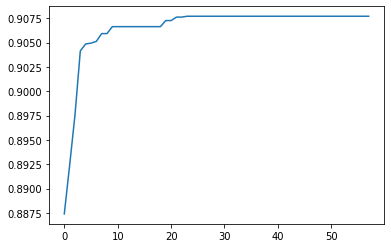

              precision    recall  f1-score   support

         0.0   0.914879  0.908022  0.911438      5871
         1.0   0.899963  0.907359  0.903646      5354

    accuracy                       0.907706     11225
   macro avg   0.907421  0.907691  0.907542     11225
weighted avg   0.907764  0.907706  0.907721     11225

Generations 0/100
Time Taken 295.64 secs Best Output 0.9077060133630289
Generations 1/100
Time Taken 285.64 secs Best Output 0.9077060133630289
Generations 2/100
Time Taken 285.17 secs Best Output 0.9077060133630289
Generations 3/100
Time Taken 281.42 secs Best Output 0.9077060133630289
Generations 4/100
Time Taken 288.21 secs Best Output 0.9077060133630289
Generations 5/100
Time Taken 274.56 secs Best Output 0.9077951002227171
Generations 6/100
Time Taken 273.83 secs Best Output 0.9077951002227171
Generations 7/100
Time Taken 280.78 secs Best Output 0.9077951002227171
Generations 8/100
Time Taken 276.78 secs Best Output 0.9077951002227171
Generations 9/100
Time Ta

In [ ]:
random.seed(101)
path = "/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT"
models = [sv]
compiling(models, path)

#DOC2VEC

In [ ]:
import random 

In [ ]:
random.seed(101)
path = "/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT_DOC@VEC"
models = [sv]
compiling(models, path)







Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT_DOC@VEC/ISOT_DocTVec.npy



current model - SVC
before - 


              precision    recall  f1-score   support

         0.0   0.999563  0.389201  0.560255      5871
         1.0   0.598837  0.999813  0.749038      5354

    accuracy                       0.680445     11225
   macro avg   0.799200  0.694507  0.654646     11225
weighted avg   0.808428  0.680445  0.650299     11225

Epochs: 1/100
Time Taken: 256.802 secs	 Best Score: 0.8698440979955456	 Best Score Epoch: 0.8698440979955456
Epochs: 2/100
Time Taken: 291.383 secs	 Best Score: 0.8768819599109131	 Best Score Epoch: 0.8768819599109131
Epochs: 3/100
Time Taken: 287.177 secs	 Best Score: 0.9357683741648107	 Best Score Epoch: 0.9357683741648107
Epochs: 4/100
Time Taken: 285.215 secs	 Best Score: 0.9616035634743876	 Best Score Epoch: 0.9616035634743876
Epochs: 5/100
Time Taken: 281.048 secs	 Best Score: 0.9616035634743876	 Best Score Epoch: 0.9421







Running on :/content/drive/MyDrive/Misinformation Datasets/Buzzfeed/buzzfeedTfidf.npy



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.619048  0.565217  0.590909        23
         1.0   0.600000  0.652174  0.625000        23

    accuracy                       0.608696        46
   macro avg   0.609524  0.608696  0.607955        46
weighted avg   0.609524  0.608696  0.607955        46

Epochs: 1/100
Time Taken: 0.66 secs	 Best Score: 0.782608695652174	 Best Score Epoch: 0.782608695652174
Epochs: 2/100
Time Taken: 0.673 secs	 Best Score: 0.782608695652174	 Best Score Epoch: 0.7391304347826086
Epochs: 3/100
Time Taken: 0.63 secs	 Best Score: 0.8260869565217391	 Best Score Epoch: 0.8260869565217391
Epochs: 4/100
Time Taken: 0.652 secs	 Best Score: 0.8260869565217391	 Best Score Epoch: 0.782608695652174
Epochs: 5/100
Time Taken: 0.633 secs	 Best Score: 0.8260869565217391	 Best Score Epoch: 0.760869565217391

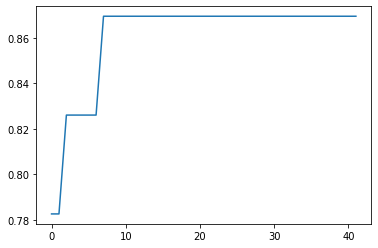

              precision    recall  f1-score   support

         0.0   0.793103  1.000000  0.884615        23
         1.0   1.000000  0.739130  0.850000        23

    accuracy                       0.869565        46
   macro avg   0.896552  0.869565  0.867308        46
weighted avg   0.896552  0.869565  0.867308        46

Generations 0/100
Time Taken 0.37 secs Best Output 0.8695652173913043
Generations 1/100
Time Taken 0.34 secs Best Output 0.8695652173913043
Generations 2/100
Time Taken 0.34 secs Best Output 0.8695652173913043
Generations 3/100
Time Taken 0.34 secs Best Output 0.8695652173913043
Generations 4/100
Time Taken 0.35 secs Best Output 0.8695652173913043
Generations 5/100
Time Taken 0.34 secs Best Output 0.8695652173913043
Generations 6/100
Time Taken 0.37 secs Best Output 0.8695652173913043
Generations 7/100
Time Taken 0.36 secs Best Output 0.8695652173913043
Generations 8/100
Time Taken 0.34 secs Best Output 0.8695652173913043
Generations 9/100
Time Taken 0.34 secs Best

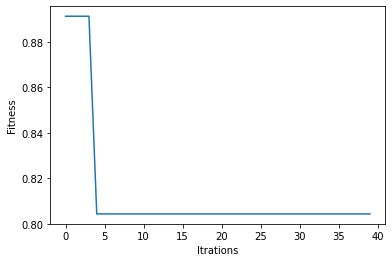

after - 


              precision    recall  f1-score   support

         0.0   0.821429  1.000000  0.901961        23
         1.0   1.000000  0.782609  0.878049        23

    accuracy                       0.891304        46
   macro avg   0.910714  0.891304  0.890005        46
weighted avg   0.910714  0.891304  0.890005        46



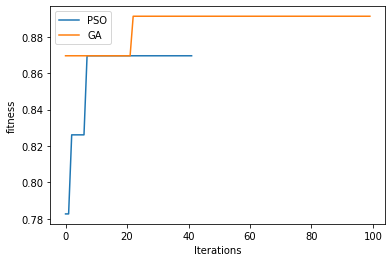

end of CURR MODEL



current model - LogisticRegression
before - 


              precision    recall  f1-score   support

         0.0   0.652174  0.652174  0.652174        23
         1.0   0.652174  0.652174  0.652174        23

    accuracy                       0.652174        46
   macro avg   0.652174  0.652174  0.652174        46
weighted avg   0.652174  0.652174  0.652174        46

Epochs: 1/100
Time Taken: 2.773 secs	 Best Score: 0.782608695652174	 Best Score Epoch: 0.782608695652174
Epochs: 2/100
Time Taken: 2.749 secs	 Best Score: 0.782608695652174	 Best Score Epoch: 0.7608695652173914
Epochs: 3/100
Time Taken: 2.622 secs	 Best Score: 0.8260869565217391	 Best Score Epoch: 0.8260869565217391
Epochs: 4/100
Time Taken: 2.677 secs	 Best Score: 0.8260869565217391	 Best Score Epoch: 0.782608695652174
Epochs: 5/100
Time Taken: 2.652 secs	 Best Score: 0.8260869565217391	 Best Score Epoch: 0.8043478260869565
Epochs: 6/100
Time Taken: 2.677 secs	 Best Score: 0.8260869565217391	 Best

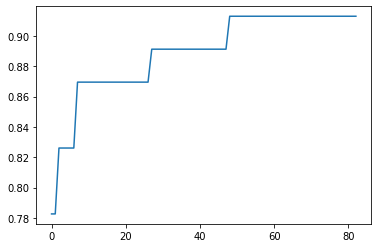

              precision    recall  f1-score   support

         0.0   0.880000  0.956522  0.916667        23
         1.0   0.952381  0.869565  0.909091        23

    accuracy                       0.913043        46
   macro avg   0.916190  0.913043  0.912879        46
weighted avg   0.916190  0.913043  0.912879        46

Generations 0/100
Time Taken 2.36 secs Best Output 0.9130434782608695
Generations 1/100
Time Taken 2.43 secs Best Output 0.9130434782608695
Generations 2/100
Time Taken 2.43 secs Best Output 0.9130434782608695
Generations 3/100
Time Taken 2.26 secs Best Output 0.9130434782608695
Generations 4/100
Time Taken 2.33 secs Best Output 0.9130434782608695
Generations 5/100
Time Taken 2.34 secs Best Output 0.9130434782608695
Generations 6/100
Time Taken 2.25 secs Best Output 0.9130434782608695
Generations 7/100
Time Taken 2.37 secs Best Output 0.9130434782608695
Generations 8/100
Time Taken 2.19 secs Best Output 0.9130434782608695
Generations 9/100
Time Taken 2.38 secs Best

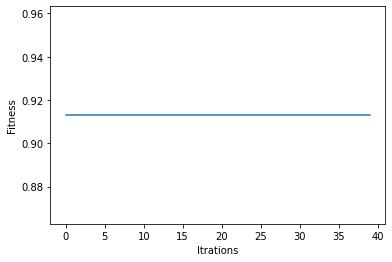

after - 


              precision    recall  f1-score   support

         0.0   0.880000  0.956522  0.916667        23
         1.0   0.952381  0.869565  0.909091        23

    accuracy                       0.913043        46
   macro avg   0.916190  0.913043  0.912879        46
weighted avg   0.916190  0.913043  0.912879        46



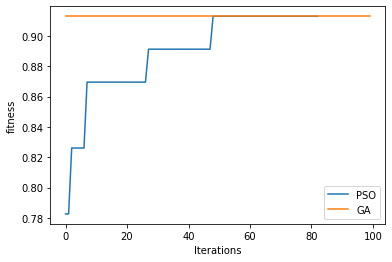

end of CURR MODEL









Running on :/content/drive/MyDrive/Misinformation Datasets/Buzzfeed/buzzfeedDocTVec.npy



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.586207  0.739130  0.653846        23
         1.0   0.647059  0.478261  0.550000        23

    accuracy                       0.608696        46
   macro avg   0.616633  0.608696  0.601923        46
weighted avg   0.616633  0.608696  0.601923        46

Epochs: 1/100
Time Taken: 0.253 secs	 Best Score: 0.6956521739130435	 Best Score Epoch: 0.6956521739130435
Epochs: 2/100
Time Taken: 0.278 secs	 Best Score: 0.717391304347826	 Best Score Epoch: 0.717391304347826
Epochs: 3/100
Time Taken: 0.274 secs	 Best Score: 0.7608695652173914	 Best Score Epoch: 0.7608695652173914
Epochs: 4/100
Time Taken: 0.273 secs	 Best Score: 0.7608695652173914	 Best Score Epoch: 0.7391304347826086
Epochs: 5/100
Time Taken: 0.283 secs	 Best Score: 0.7608695652173914	 Best Sco

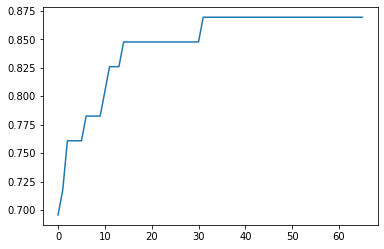

              precision    recall  f1-score   support

         0.0   0.840000  0.913043  0.875000        23
         1.0   0.904762  0.826087  0.863636        23

    accuracy                       0.869565        46
   macro avg   0.872381  0.869565  0.869318        46
weighted avg   0.872381  0.869565  0.869318        46

Generations 0/100
Time Taken 0.22 secs Best Output 0.8695652173913043
Generations 1/100
Time Taken 0.2 secs Best Output 0.8695652173913043
Generations 2/100
Time Taken 0.2 secs Best Output 0.8695652173913043
Generations 3/100
Time Taken 0.19 secs Best Output 0.8695652173913043
Generations 4/100
Time Taken 0.21 secs Best Output 0.8695652173913043
Generations 5/100
Time Taken 0.19 secs Best Output 0.8695652173913043
Generations 6/100
Time Taken 0.22 secs Best Output 0.8695652173913043
Generations 7/100
Time Taken 0.21 secs Best Output 0.8695652173913043
Generations 8/100
Time Taken 0.2 secs Best Output 0.8695652173913043
Generations 9/100
Time Taken 0.21 secs Best Ou

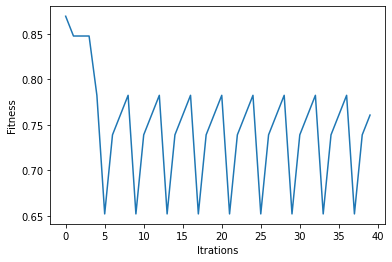

after - 


              precision    recall  f1-score   support

         0.0   0.840000  0.913043  0.875000        23
         1.0   0.904762  0.826087  0.863636        23

    accuracy                       0.869565        46
   macro avg   0.872381  0.869565  0.869318        46
weighted avg   0.872381  0.869565  0.869318        46



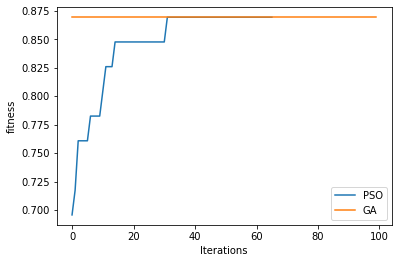

end of CURR MODEL



current model - LogisticRegression
before - 


              precision    recall  f1-score   support

         0.0   0.666667  0.608696  0.636364        23
         1.0   0.640000  0.695652  0.666667        23

    accuracy                       0.652174        46
   macro avg   0.653333  0.652174  0.651515        46
weighted avg   0.653333  0.652174  0.651515        46

Epochs: 1/100
Time Taken: 1.67 secs	 Best Score: 0.782608695652174	 Best Score Epoch: 0.782608695652174
Epochs: 2/100
Time Taken: 1.828 secs	 Best Score: 0.782608695652174	 Best Score Epoch: 0.7608695652173914
Epochs: 3/100
Time Taken: 1.863 secs	 Best Score: 0.8260869565217391	 Best Score Epoch: 0.8260869565217391
Epochs: 4/100
Time Taken: 1.81 secs	 Best Score: 0.8260869565217391	 Best Score Epoch: 0.782608695652174
Epochs: 5/100
Time Taken: 1.799 secs	 Best Score: 0.8478260869565217	 Best Score Epoch: 0.8478260869565217
Epochs: 6/100
Time Taken: 1.837 secs	 Best Score: 0.8478260869565217	 Best S

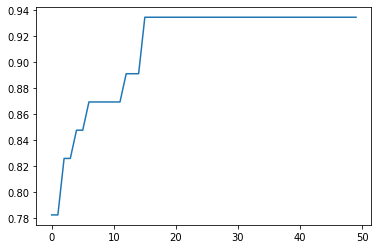

              precision    recall  f1-score   support

         0.0   0.916667  0.956522  0.936170        23
         1.0   0.954545  0.913043  0.933333        23

    accuracy                       0.934783        46
   macro avg   0.935606  0.934783  0.934752        46
weighted avg   0.935606  0.934783  0.934752        46

Generations 0/100
Time Taken 1.73 secs Best Output 0.9347826086956522
Generations 1/100
Time Taken 1.69 secs Best Output 0.9347826086956522
Generations 2/100
Time Taken 1.76 secs Best Output 0.9347826086956522
Generations 3/100
Time Taken 1.71 secs Best Output 0.9347826086956522
Generations 4/100
Time Taken 1.26 secs Best Output 0.9347826086956522
Generations 5/100
Time Taken 1.33 secs Best Output 0.9347826086956522
Generations 6/100
Time Taken 1.72 secs Best Output 0.9347826086956522
Generations 7/100
Time Taken 1.69 secs Best Output 0.9347826086956522
Generations 8/100
Time Taken 1.3 secs Best Output 0.9347826086956522
Generations 9/100
Time Taken 1.77 secs Best 

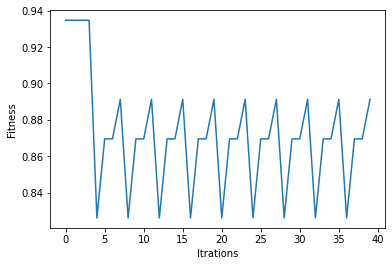

after - 


              precision    recall  f1-score   support

         0.0   0.916667  0.956522  0.936170        23
         1.0   0.954545  0.913043  0.933333        23

    accuracy                       0.934783        46
   macro avg   0.935606  0.934783  0.934752        46
weighted avg   0.935606  0.934783  0.934752        46



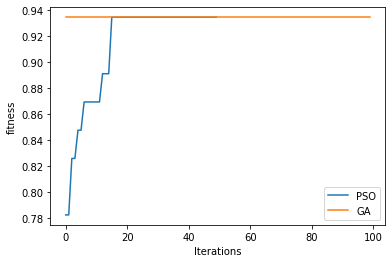

end of CURR MODEL









Running on :/content/drive/MyDrive/Misinformation Datasets/Buzzfeed/buzzfeedSentEmbed.npy



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.555556  0.652174  0.600000        23
         1.0   0.578947  0.478261  0.523810        23

    accuracy                       0.565217        46
   macro avg   0.567251  0.565217  0.561905        46
weighted avg   0.567251  0.565217  0.561905        46

Epochs: 1/100
Time Taken: 0.949 secs	 Best Score: 0.6739130434782609	 Best Score Epoch: 0.6739130434782609
Epochs: 2/100
Time Taken: 1.021 secs	 Best Score: 0.7391304347826086	 Best Score Epoch: 0.7391304347826086
Epochs: 3/100
Time Taken: 1.048 secs	 Best Score: 0.7391304347826086	 Best Score Epoch: 0.7391304347826086
Epochs: 4/100
Time Taken: 1.021 secs	 Best Score: 0.7608695652173914	 Best Score Epoch: 0.7608695652173914
Epochs: 5/100
Time Taken: 1.033 secs	 Best Score: 0.7608695652173914	 Best

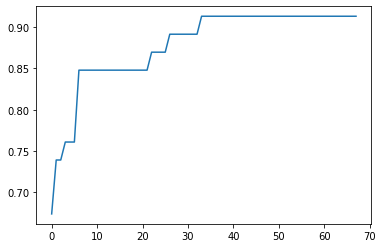

              precision    recall  f1-score   support

         0.0   0.913043  0.913043  0.913043        23
         1.0   0.913043  0.913043  0.913043        23

    accuracy                       0.913043        46
   macro avg   0.913043  0.913043  0.913043        46
weighted avg   0.913043  0.913043  0.913043        46

Generations 0/100
Time Taken 0.89 secs Best Output 0.9130434782608695
Generations 1/100
Time Taken 0.69 secs Best Output 0.9130434782608695
Generations 2/100
Time Taken 0.84 secs Best Output 0.9130434782608695
Generations 3/100
Time Taken 0.79 secs Best Output 0.9130434782608695
Generations 4/100
Time Taken 0.87 secs Best Output 0.9130434782608695
Generations 5/100
Time Taken 0.85 secs Best Output 0.9130434782608695
Generations 6/100
Time Taken 0.84 secs Best Output 0.9130434782608695
Generations 7/100
Time Taken 0.77 secs Best Output 0.9130434782608695
Generations 8/100
Time Taken 0.89 secs Best Output 0.9130434782608695
Generations 9/100
Time Taken 0.86 secs Best

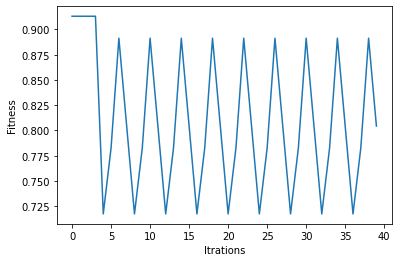

after - 


              precision    recall  f1-score   support

         0.0   0.913043  0.913043  0.913043        23
         1.0   0.913043  0.913043  0.913043        23

    accuracy                       0.913043        46
   macro avg   0.913043  0.913043  0.913043        46
weighted avg   0.913043  0.913043  0.913043        46



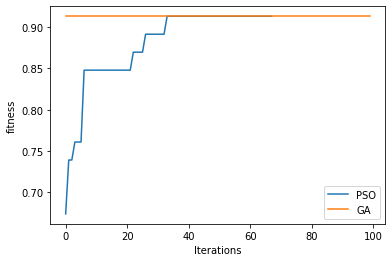

end of CURR MODEL



current model - LogisticRegression
before - 


              precision    recall  f1-score   support

         0.0   0.652174  0.652174  0.652174        23
         1.0   0.652174  0.652174  0.652174        23

    accuracy                       0.652174        46
   macro avg   0.652174  0.652174  0.652174        46
weighted avg   0.652174  0.652174  0.652174        46

Epochs: 1/100
Time Taken: 2.124 secs	 Best Score: 0.717391304347826	 Best Score Epoch: 0.717391304347826
Epochs: 2/100
Time Taken: 2.309 secs	 Best Score: 0.717391304347826	 Best Score Epoch: 0.717391304347826
Epochs: 3/100
Time Taken: 2.04 secs	 Best Score: 0.782608695652174	 Best Score Epoch: 0.782608695652174
Epochs: 4/100
Time Taken: 2.129 secs	 Best Score: 0.782608695652174	 Best Score Epoch: 0.7608695652173914
Epochs: 5/100
Time Taken: 2.235 secs	 Best Score: 0.782608695652174	 Best Score Epoch: 0.782608695652174
Epochs: 6/100
Time Taken: 2.212 secs	 Best Score: 0.782608695652174	 Best Score 

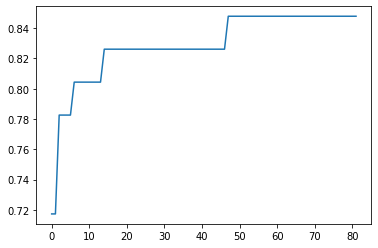

              precision    recall  f1-score   support

         0.0   0.833333  0.869565  0.851064        23
         1.0   0.863636  0.826087  0.844444        23

    accuracy                       0.847826        46
   macro avg   0.848485  0.847826  0.847754        46
weighted avg   0.848485  0.847826  0.847754        46

Generations 0/100
Time Taken 1.97 secs Best Output 0.8478260869565217
Generations 1/100
Time Taken 2.0 secs Best Output 0.8478260869565217
Generations 2/100
Time Taken 2.09 secs Best Output 0.8478260869565217
Generations 3/100
Time Taken 1.96 secs Best Output 0.8478260869565217
Generations 4/100
Time Taken 2.08 secs Best Output 0.8478260869565217
Generations 5/100
Time Taken 2.06 secs Best Output 0.8478260869565217
Generations 6/100
Time Taken 2.09 secs Best Output 0.8478260869565217
Generations 7/100
Time Taken 2.07 secs Best Output 0.8478260869565217
Generations 8/100
Time Taken 1.97 secs Best Output 0.8478260869565217
Generations 9/100
Time Taken 1.84 secs Best 

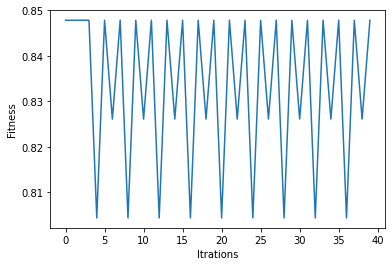

after - 


              precision    recall  f1-score   support

         0.0   0.833333  0.869565  0.851064        23
         1.0   0.863636  0.826087  0.844444        23

    accuracy                       0.847826        46
   macro avg   0.848485  0.847826  0.847754        46
weighted avg   0.848485  0.847826  0.847754        46



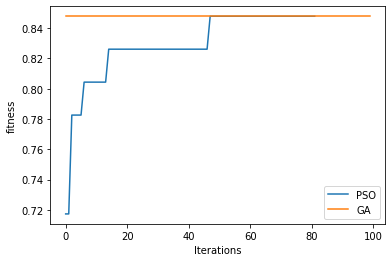

end of CURR MODEL









Running on :/content/drive/MyDrive/Misinformation Datasets/Buzzfeed/buzzfeedWord2Vec.npy



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.687500  0.478261  0.564103        23
         1.0   0.600000  0.782609  0.679245        23

    accuracy                       0.630435        46
   macro avg   0.643750  0.630435  0.621674        46
weighted avg   0.643750  0.630435  0.621674        46

Epochs: 1/100
Time Taken: 0.252 secs	 Best Score: 0.7391304347826086	 Best Score Epoch: 0.7391304347826086
Epochs: 2/100
Time Taken: 0.299 secs	 Best Score: 0.7391304347826086	 Best Score Epoch: 0.6521739130434783
Epochs: 3/100
Time Taken: 0.274 secs	 Best Score: 0.7608695652173914	 Best Score Epoch: 0.7608695652173914
Epochs: 4/100
Time Taken: 0.278 secs	 Best Score: 0.7608695652173914	 Best Score Epoch: 0.6956521739130435
Epochs: 5/100
Time Taken: 0.264 secs	 Best Score: 0.7608695652173914	 Best 

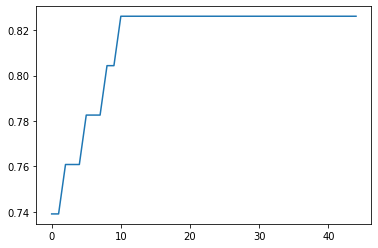

              precision    recall  f1-score   support

         0.0   0.800000  0.869565  0.833333        23
         1.0   0.857143  0.782609  0.818182        23

    accuracy                       0.826087        46
   macro avg   0.828571  0.826087  0.825758        46
weighted avg   0.828571  0.826087  0.825758        46

Generations 0/100
Time Taken 0.2 secs Best Output 0.8260869565217391
Generations 1/100
Time Taken 0.22 secs Best Output 0.8260869565217391
Generations 2/100
Time Taken 0.21 secs Best Output 0.8260869565217391
Generations 3/100
Time Taken 0.2 secs Best Output 0.8260869565217391
Generations 4/100
Time Taken 0.23 secs Best Output 0.8260869565217391
Generations 5/100
Time Taken 0.22 secs Best Output 0.8260869565217391
Generations 6/100
Time Taken 0.2 secs Best Output 0.8260869565217391
Generations 7/100
Time Taken 0.22 secs Best Output 0.8260869565217391
Generations 8/100
Time Taken 0.22 secs Best Output 0.8260869565217391
Generations 9/100
Time Taken 0.21 secs Best Ou

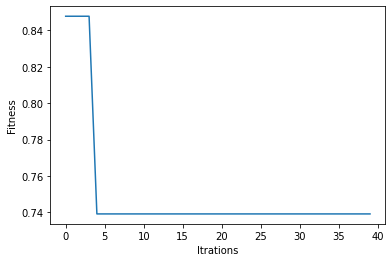

after - 


              precision    recall  f1-score   support

         0.0   0.833333  0.869565  0.851064        23
         1.0   0.863636  0.826087  0.844444        23

    accuracy                       0.847826        46
   macro avg   0.848485  0.847826  0.847754        46
weighted avg   0.848485  0.847826  0.847754        46



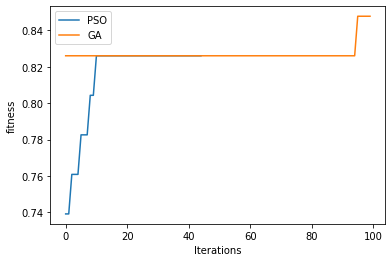

end of CURR MODEL



current model - LogisticRegression
before - 


              precision    recall  f1-score   support

         0.0   0.777778  0.608696  0.682927        23
         1.0   0.678571  0.826087  0.745098        23

    accuracy                       0.717391        46
   macro avg   0.728175  0.717391  0.714012        46
weighted avg   0.728175  0.717391  0.714012        46

Epochs: 1/100
Time Taken: 1.727 secs	 Best Score: 0.7608695652173914	 Best Score Epoch: 0.7608695652173914
Epochs: 2/100
Time Taken: 1.815 secs	 Best Score: 0.7608695652173914	 Best Score Epoch: 0.7608695652173914
Epochs: 3/100
Time Taken: 1.784 secs	 Best Score: 0.8043478260869565	 Best Score Epoch: 0.8043478260869565
Epochs: 4/100
Time Taken: 1.723 secs	 Best Score: 0.8043478260869565	 Best Score Epoch: 0.782608695652174
Epochs: 5/100
Time Taken: 1.775 secs	 Best Score: 0.8260869565217391	 Best Score Epoch: 0.8260869565217391
Epochs: 6/100
Time Taken: 1.777 secs	 Best Score: 0.8260869565217391	 B

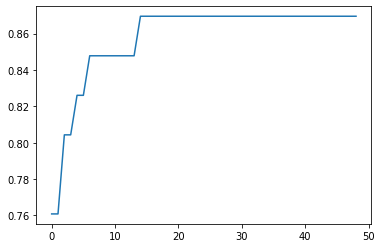

              precision    recall  f1-score   support

         0.0   0.904762  0.826087  0.863636        23
         1.0   0.840000  0.913043  0.875000        23

    accuracy                       0.869565        46
   macro avg   0.872381  0.869565  0.869318        46
weighted avg   0.872381  0.869565  0.869318        46

Generations 0/100
Time Taken 1.79 secs Best Output 0.8695652173913043
Generations 1/100
Time Taken 1.64 secs Best Output 0.8695652173913043
Generations 2/100
Time Taken 1.87 secs Best Output 0.8695652173913043
Generations 3/100
Time Taken 1.6 secs Best Output 0.8695652173913043
Generations 4/100
Time Taken 1.72 secs Best Output 0.8695652173913043
Generations 5/100
Time Taken 1.69 secs Best Output 0.8695652173913043
Generations 6/100
Time Taken 1.66 secs Best Output 0.8695652173913043
Generations 7/100
Time Taken 1.78 secs Best Output 0.8695652173913043
Generations 8/100
Time Taken 1.64 secs Best Output 0.8695652173913043
Generations 9/100
Time Taken 1.75 secs Best 

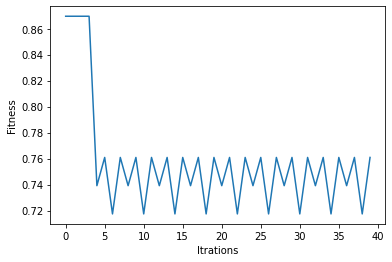

after - 


              precision    recall  f1-score   support

         0.0   0.904762  0.826087  0.863636        23
         1.0   0.840000  0.913043  0.875000        23

    accuracy                       0.869565        46
   macro avg   0.872381  0.869565  0.869318        46
weighted avg   0.872381  0.869565  0.869318        46



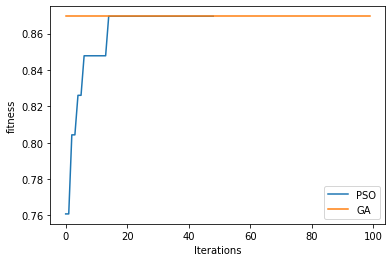

end of CURR MODEL





In [ ]:
random.seed(101)
path = "/content/drive/MyDrive/Misinformation Datasets/Buzzfeed"
models = [dt,lr]
compiling(models, path)

#IMPORTANT OUTPUT 







Running on :/content/Buzzfeed/buzzfeedTfidf.npy



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.782609  0.782609  0.782609        23
         1.0   0.782609  0.782609  0.782609        23

    accuracy                       0.782609        46
   macro avg   0.782609  0.782609  0.782609        46
weighted avg   0.782609  0.782609  0.782609        46

Epochs: 1/100	
Time Taken: 0.561 secs	 Best Score: 0.8478260869565217	 Best Score Epoch: 0.8478260869565217
Epochs: 2/100	
Time Taken: 0.615 secs	 Best Score: 0.8913043478260869	 Best Score Epoch: 0.8913043478260869
Epochs: 3/100	
Time Taken: 0.592 secs	 Best Score: 0.8913043478260869	 Best Score Epoch: 0.8695652173913043
Epochs: 4/100	
Time Taken: 0.604 secs	 Best Score: 0.8913043478260869	 Best Score Epoch: 0.8478260869565217
Epochs: 5/100	
Time Taken: 0.625 secs	 Best Score: 0.8913043478260869	 Best Score Epoch: 0.8695652173913043
Epochs: 6/100	
Time Taken

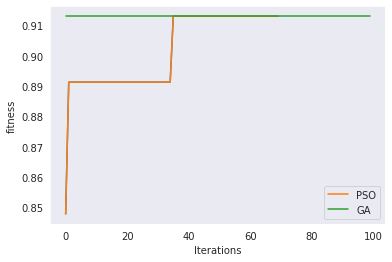

end of CURR MODEL





In [ ]:
path = "/content/Buzzfeed"
models = [dt]
compiling(models, path)

#New Version v1







Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/jruvika/jruvika_Tfidf.npy



current model - LogisticRegression
before - 


              precision    recall  f1-score   support

         0.0   0.847181  0.890796  0.868441       641
         1.0   0.867675  0.816726  0.841430       562

    accuracy                       0.856193      1203
   macro avg   0.857428  0.853761  0.854935      1203
weighted avg   0.856755  0.856193  0.855822      1203

Epochs: 1/100	 Time Taken: 34.241 secs	 Best Score: 0.9326683291770573	 Best Score Epoch: 0.9326683291770573
Saving...
Saved!
Epochs: 2/100	 Time Taken: 32.877 secs	 Best Score: 0.9326683291770573	 Best Score Epoch: 0.9193682460515378
Saving...
Saved!
Epochs: 3/100	 Time Taken: 33.0 secs	 Best Score: 0.9326683291770573	 Best Score Epoch: 0.9152119700748129
Saving...
Saved!
Epochs: 4/100	 Time Taken: 35.426 secs	 Best Score: 0.943474646716542	 Best Score Epoch: 0.943474646716542
Saving...
Saved!
Epochs: 5/100	 Time T

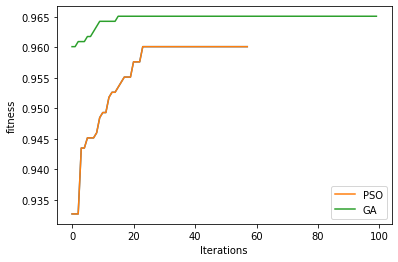

end of CURR MODEL



current model - SVC
before - 


              precision    recall  f1-score   support

         0.0   0.585253  0.198128  0.296037       641
         1.0   0.478702  0.839858  0.609819       562

    accuracy                       0.497922      1203
   macro avg   0.531978  0.518993  0.452928      1203
weighted avg   0.535476  0.497922  0.442625      1203

Epochs: 1/100	 Time Taken: 114.22 secs	 Best Score: 0.6334164588528678	 Best Score Epoch: 0.6334164588528678
Saving...
Saved!
Epochs: 2/100	 Time Taken: 113.545 secs	 Best Score: 0.6392352452202826	 Best Score Epoch: 0.6392352452202826
Saving...
Saved!
Epochs: 3/100	 Time Taken: 113.931 secs	 Best Score: 0.6392352452202826	 Best Score Epoch: 0.5278470490440565
Saving...
Saved!
Epochs: 4/100	 Time Taken: 113.858 secs	 Best Score: 0.6458852867830424	 Best Score Epoch: 0.6458852867830424
Saving...
Saved!
Epochs: 5/100	 Time Taken: 113.369 secs	 Best Score: 0.6458852867830424	 Best Score Epoch: 0.6300914380714879
Sav

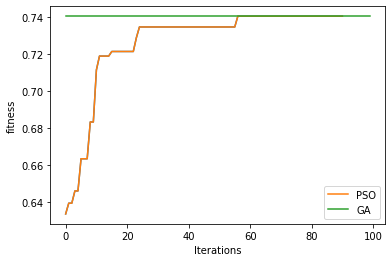

end of CURR MODEL



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.970219  0.965679  0.967944       641
         1.0   0.961062  0.966192  0.963620       562

    accuracy                       0.965919      1203
   macro avg   0.965641  0.965935  0.965782      1203
weighted avg   0.965941  0.965919  0.965924      1203

Epochs: 1/100	 Time Taken: 13.163 secs	 Best Score: 0.969243557772236	 Best Score Epoch: 0.969243557772236
Saving...
Saved!
Epochs: 2/100	 Time Taken: 13.806 secs	 Best Score: 0.969243557772236	 Best Score Epoch: 0.9684123025768911
Saving...
Saved!
Epochs: 3/100	 Time Taken: 12.453 secs	 Best Score: 0.970906068162926	 Best Score Epoch: 0.970906068162926
Saving...
Saved!
Epochs: 4/100	 Time Taken: 13.265 secs	 Best Score: 0.970906068162926	 Best Score Epoch: 0.970074812967581
Saving...
Saved!
Epochs: 5/100	 Time Taken: 11.624 secs	 Best Score: 0.9742310889443059	 Best Score Epoch: 0.974231088944

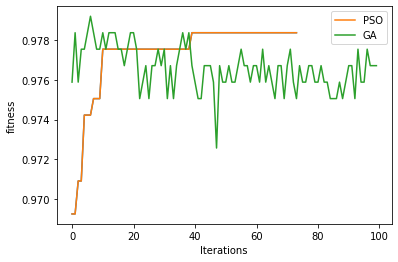

end of CURR MODEL









Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/jruvika/jruvika_DocTVec.npy



current model - LogisticRegression
before - 


              precision    recall  f1-score   support

         0.0   0.890855  0.942278  0.915845       641
         1.0   0.929524  0.868327  0.897884       562

    accuracy                       0.907731      1203
   macro avg   0.910190  0.905303  0.906865      1203
weighted avg   0.908920  0.907731  0.907454      1203

Epochs: 1/100	 Time Taken: 7.217 secs	 Best Score: 0.9077306733167082	 Best Score Epoch: 0.8694929343308395
Saving...
Saved!
Epochs: 2/100	 Time Taken: 7.181 secs	 Best Score: 0.9077306733167082	 Best Score Epoch: 0.8935993349958438
Saving...
Saved!
Epochs: 3/100	 Time Taken: 7.205 secs	 Best Score: 0.9077306733167082	 Best Score Epoch: 0.9002493765586035
Saving...
Saved!
Epochs: 4/100	 Time Taken: 7.109 secs	 Best Score: 0.9077306733167082	 Best Score Epoch: 0.8977556109725686
Saving...
Saved

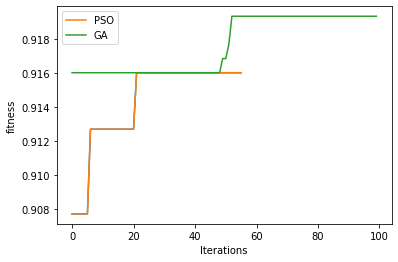

end of CURR MODEL



current model - SVC
before - 


              precision    recall  f1-score   support

         0.0   0.599251  0.249610  0.352423       641
         1.0   0.486111  0.809609  0.607477       562

    accuracy                       0.511222      1203
   macro avg   0.542681  0.529609  0.479950      1203
weighted avg   0.546396  0.511222  0.471575      1203

Epochs: 1/100	 Time Taken: 15.405 secs	 Best Score: 0.8088113050706567	 Best Score Epoch: 0.8088113050706567
Saving...
Saved!
Epochs: 2/100	 Time Taken: 15.367 secs	 Best Score: 0.8088113050706567	 Best Score Epoch: 0.7481296758104738
Saving...
Saved!
Epochs: 3/100	 Time Taken: 15.366 secs	 Best Score: 0.8088113050706567	 Best Score Epoch: 0.769742310889443
Saving...
Saved!
Epochs: 4/100	 Time Taken: 15.375 secs	 Best Score: 0.8088113050706567	 Best Score Epoch: 0.798836242726517
Saving...
Saved!
Epochs: 5/100	 Time Taken: 15.395 secs	 Best Score: 0.8088113050706567	 Best Score Epoch: 0.772236076475478
Saving...


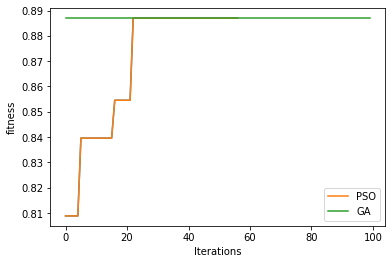

end of CURR MODEL



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.822458  0.845554  0.833846       641
         1.0   0.818015  0.791815  0.804702       562

    accuracy                       0.820449      1203
   macro avg   0.820236  0.818684  0.819274      1203
weighted avg   0.820382  0.820449  0.820231      1203

Epochs: 1/100	 Time Taken: 7.492 secs	 Best Score: 0.8354114713216958	 Best Score Epoch: 0.8354114713216958
Saving...
Saved!
Epochs: 2/100	 Time Taken: 9.087 secs	 Best Score: 0.8354114713216958	 Best Score Epoch: 0.828761429758936
Saving...
Saved!
Epochs: 3/100	 Time Taken: 8.764 secs	 Best Score: 0.8354114713216958	 Best Score Epoch: 0.828761429758936
Saving...
Saved!
Epochs: 4/100	 Time Taken: 8.531 secs	 Best Score: 0.8354114713216958	 Best Score Epoch: 0.8354114713216958
Saving...
Saved!
Epochs: 5/100	 Time Taken: 8.274 secs	 Best Score: 0.8403990024937655	 Best Score Epoch: 0.840399002493

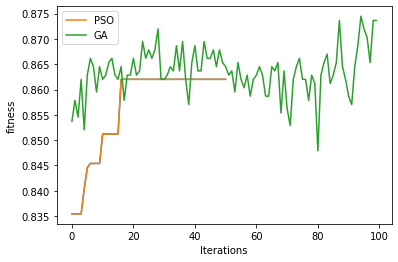

end of CURR MODEL









Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/jruvika/jruvika_SentEmbed.npy



current model - LogisticRegression
before - 


              precision    recall  f1-score   support

         0.0   0.832117  0.889236  0.859729       641
         1.0   0.862934  0.795374  0.827778       562

    accuracy                       0.845387      1203
   macro avg   0.847526  0.842305  0.843753      1203
weighted avg   0.846514  0.845387  0.844802      1203

Epochs: 1/100	 Time Taken: 15.598 secs	 Best Score: 0.8503740648379052	 Best Score Epoch: 0.8503740648379052
Saving...
Saved!
Epochs: 2/100	 Time Taken: 15.394 secs	 Best Score: 0.8645054031587698	 Best Score Epoch: 0.8645054031587698
Saving...
Saved!
Epochs: 3/100	 Time Taken: 15.402 secs	 Best Score: 0.8819617622610141	 Best Score Epoch: 0.8819617622610141
Saving...
Saved!
Epochs: 4/100	 Time Taken: 15.346 secs	 Best Score: 0.8819617622610141	 Best Score Epoch: 0.8719866999168745
Saving...

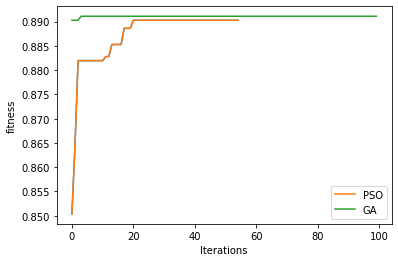

end of CURR MODEL



current model - SVC
before - 


              precision    recall  f1-score   support

         0.0   0.494048  0.388456  0.434934       641
         1.0   0.439199  0.546263  0.486915       562

    accuracy                       0.462178      1203
   macro avg   0.466623  0.467359  0.460925      1203
weighted avg   0.468424  0.462178  0.459218      1203

Epochs: 1/100	 Time Taken: 59.757 secs	 Best Score: 0.6758104738154613	 Best Score Epoch: 0.6758104738154613
Saving...
Saved!
Epochs: 2/100	 Time Taken: 59.783 secs	 Best Score: 0.6758104738154613	 Best Score Epoch: 0.6384039900249376
Saving...
Saved!
Epochs: 3/100	 Time Taken: 59.946 secs	 Best Score: 0.6758104738154613	 Best Score Epoch: 0.5477971737323358
Saving...
Saved!
Epochs: 4/100	 Time Taken: 59.622 secs	 Best Score: 0.6758104738154613	 Best Score Epoch: 0.6275976724854531
Saving...
Saved!
Epochs: 5/100	 Time Taken: 59.509 secs	 Best Score: 0.6758104738154613	 Best Score Epoch: 0.6142975893599335
Saving.

In [ ]:
path = "/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/jruvika"
models = [lr, sv, dt]
compiling(models, path)

# new version v2 

In [ ]:
files = glob.glob("/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/jruvika" +"/*.npy")

In [ ]:
files

['/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/jruvika/jruvika_SentEmbed.npy',
 '/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/jruvika/jruvika_Word2Vec.npy']







Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/jruvika/jruvika_SentEmbed.npy



current model - LogisticRegression
before - 


              precision    recall  f1-score   support

         0.0   0.820334  0.918877  0.866814       641
         1.0   0.892784  0.770463  0.827125       562

    accuracy                       0.849543      1203
   macro avg   0.856559  0.844670  0.846969      1203
weighted avg   0.854180  0.849543  0.848273      1203

Epochs: 1/100	 Time Taken: 13.936 secs	 Best Score: 0.8711554447215295	 Best Score Epoch: 0.8711554447215295
Saving...
Saved!
Epochs: 2/100	 Time Taken: 13.964 secs	 Best Score: 0.8761429758935994	 Best Score Epoch: 0.8761429758935994
Saving...
Saved!
Epochs: 3/100	 Time Taken: 14.027 secs	 Best Score: 0.8944305901911886	 Best Score Epoch: 0.8944305901911886
Saving...
Saved!
Epochs: 4/100	 Time Taken: 14.499 secs	 Best Score: 0.8944305901911886	 Best Score Epoch: 0.8894430590191189
Saving...
Saved!
Epochs: 5/100

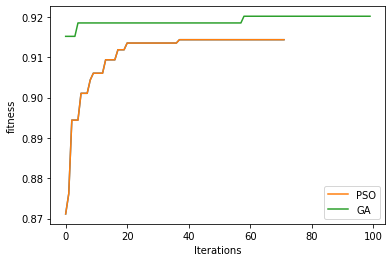

end of CURR MODEL



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.857143  0.851794  0.854460       641
         1.0   0.832155  0.838078  0.835106       562

    accuracy                       0.845387      1203
   macro avg   0.844649  0.844936  0.844783      1203
weighted avg   0.845470  0.845387  0.845419      1203

Epochs: 1/100	 Time Taken: 29.882 secs	 Best Score: 0.8487115544472152	 Best Score Epoch: 0.8487115544472152
Saving...
Saved!
Epochs: 2/100	 Time Taken: 37.132 secs	 Best Score: 0.85785536159601	 Best Score Epoch: 0.85785536159601
Saving...
Saved!
Epochs: 3/100	 Time Taken: 36.608 secs	 Best Score: 0.85785536159601	 Best Score Epoch: 0.85785536159601
Saving...
Saved!
Epochs: 4/100	 Time Taken: 36.971 secs	 Best Score: 0.8603491271820449	 Best Score Epoch: 0.8603491271820449
Saving...
Saved!
Epochs: 5/100	 Time Taken: 36.028 secs	 Best Score: 0.8603491271820449	 Best Score Epoch: 0.8536990856192

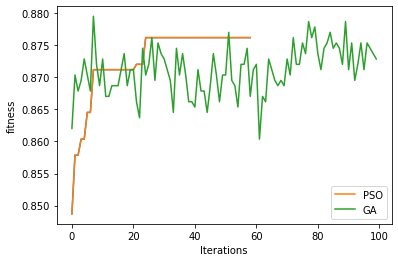

end of CURR MODEL









Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/jruvika/jruvika_Word2Vec.npy



current model - LogisticRegression
before - 


              precision    recall  f1-score   support

         0.0   0.829942  0.890796  0.859293       641
         1.0   0.864078  0.791815  0.826370       562

    accuracy                       0.844555      1203
   macro avg   0.847010  0.841305  0.842831      1203
weighted avg   0.845889  0.844555  0.843912      1203

Epochs: 1/100	 Time Taken: 7.431 secs	 Best Score: 0.8894430590191189	 Best Score Epoch: 0.8894430590191189
Saving...
Saved!
Epochs: 2/100	 Time Taken: 7.651 secs	 Best Score: 0.8894430590191189	 Best Score Epoch: 0.8844555278470491
Saving...
Saved!
Epochs: 3/100	 Time Taken: 7.455 secs	 Best Score: 0.8911055694098088	 Best Score Epoch: 0.8911055694098088
Saving...
Saved!
Epochs: 4/100	 Time Taken: 7.45 secs	 Best Score: 0.8911055694098088	 Best Score Epoch: 0.8861180382377389
Saving...
Saved

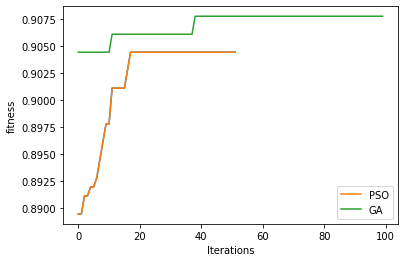

end of CURR MODEL



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.871450  0.909516  0.890076       641
         1.0   0.891386  0.846975  0.868613       562

    accuracy                       0.880299      1203
   macro avg   0.881418  0.878246  0.879345      1203
weighted avg   0.880763  0.880299  0.880049      1203

Epochs: 1/100	 Time Taken: 5.649 secs	 Best Score: 0.8960931005818786	 Best Score Epoch: 0.8960931005818786
Saving...
Saved!
Epochs: 2/100	 Time Taken: 6.871 secs	 Best Score: 0.8985868661679135	 Best Score Epoch: 0.8985868661679135
Saving...
Saved!
Epochs: 3/100	 Time Taken: 6.357 secs	 Best Score: 0.8985868661679135	 Best Score Epoch: 0.8977556109725686
Saving...
Saved!
Epochs: 4/100	 Time Taken: 6.178 secs	 Best Score: 0.9019118869492935	 Best Score Epoch: 0.9019118869492935
Saving...
Saved!
Epochs: 5/100	 Time Taken: 6.429 secs	 Best Score: 0.9085619285120532	 Best Score Epoch: 0.9085619285

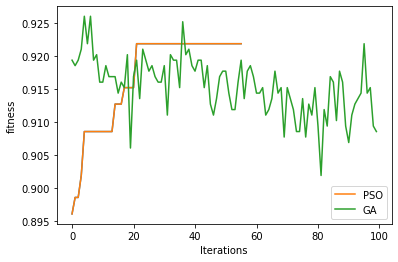

end of CURR MODEL





In [ ]:
path = "/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/jruvika"
models = [lr, dt]
compiling(models, path)

#older Version







Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/jruvika/jruvika_Tfidf.npy



current model - LogisticRegression
before - 


              precision    recall  f1-score   support

         0.0   0.835843  0.865835  0.850575       641
         1.0   0.840445  0.806050  0.822888       562

    accuracy                       0.837905      1203
   macro avg   0.838144  0.835942  0.836731      1203
weighted avg   0.837993  0.837905  0.837641      1203

Epochs: 1/100	 Time Taken: 32.889 secs	 Best Score: 0.9285120532003325	 Best Score Epoch: 0.9285120532003325
Saving...
Saved!
Epochs: 2/100	 Time Taken: 38.483 secs	 Best Score: 0.9318370739817123	 Best Score Epoch: 0.9318370739817123
Saving...
Saved!
Epochs: 3/100	 Time Taken: 32.561 secs	 Best Score: 0.9326683291770573	 Best Score Epoch: 0.9326683291770573
Saving...
Saved!
Epochs: 4/100	 Time Taken: 32.165 secs	 Best Score: 0.9451371571072319	 Best Score Epoch: 0.9451371571072319
Saving...
Saved!
Epochs: 5/100	 Ti

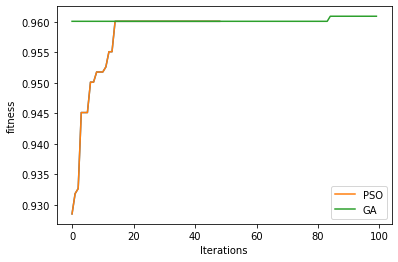

end of CURR MODEL



current model - SVC
before - 


              precision    recall  f1-score   support

         0.0   0.468822  0.316693  0.378026       641
         1.0   0.431169  0.590747  0.498498       562

    accuracy                       0.444722      1203
   macro avg   0.449996  0.453720  0.438262      1203
weighted avg   0.451232  0.444722  0.434307      1203

Epochs: 1/100	 Time Taken: 113.877 secs	 Best Score: 0.6791354945968412	 Best Score Epoch: 0.6791354945968412
Saving...
Saved!
Epochs: 2/100	 Time Taken: 114.0 secs	 Best Score: 0.6791354945968412	 Best Score Epoch: 0.6616791354945969
Saving...
Saved!
Epochs: 3/100	 Time Taken: 114.072 secs	 Best Score: 0.6791354945968412	 Best Score Epoch: 0.6791354945968412
Saving...
Saved!
Epochs: 4/100	 Time Taken: 113.646 secs	 Best Score: 0.685785536159601	 Best Score Epoch: 0.685785536159601
Saving...
Saved!
Epochs: 5/100	 Time Taken: 113.667 secs	 Best Score: 0.685785536159601	 Best Score Epoch: 0.6824605153782212
Saving.

In [ ]:
path = "/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/jruvika"
models = [lr, sv, dt]
compiling(models, path)

#standard code

In [ ]:
s[:-4] + type(model).__name__ )

'AQ'

In [ ]:
from sklearn import svm
sv = svm.SVC(max_iter=200)

In [ ]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=150)

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [ ]:
l = [lr,sv,dt]

In [ ]:
import glob

In [ ]:
files = glob.glob( "/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT"+"/*.npy")

In [ ]:
files

['/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOT_Tfidf.npy',
 '/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOT_DocTVec.npy',
 '/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOTWord2Vec.npy']

In [ ]:
for f in files:
  print(f[:-4]+"/"+"lr"+"/bestFeature.npy")

/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOT_Tfidf/lr/bestFeature.npy
/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOT_DocTVec/lr/bestFeature.npy
/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOTWord2Vec/lr/bestFeature.npy


In [ ]:
def compiling(models,folder):
  files = glob.glob(folder +"/*.npy")
  for f in files:
    dataset = np.load(f)
    #x_train, x_test, y_train, y_test = train_test_split(xData, yData, test_size=0.30, shuffle=False)
    print(5 *"\n")
    print("Running on :" + f)
    print(2*"\n")
    for model in models:
      print("current model - " + type(model).__name__ )
      bestFeatures,Finalscores = trainModel(dataset[:,:-1], dataset[:,-1], model=model, populationSize=40)
      np.save(f[:-4]+"/"+ type(model).__name__ + "/bestFeature.npy",bestFeatures)
      np.save(f[:-4]+"/"+ type(model).__name__ + "/scores.npy",Finalscores)
      print("end of CURR MODEL")
      print(2* "\n")


In [ ]:
compiling(l,"/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT")







Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOT_Tfidf.npy



current model - LogisticRegression
before - 


              precision    recall  f1-score   support

         0.0   0.931785  0.919639  0.925672      6981
         1.0   0.914742  0.927570  0.921111      6489

    accuracy                       0.923460     13470
   macro avg   0.923263  0.923604  0.923392     13470
weighted avg   0.923575  0.923460  0.923475     13470

Epochs: 1/100	 Time Taken: 323.22 secs	 Best Score: 0.9708240534521159	 Best Score Epoch: 0.9708240534521159
Epochs: 2/100	 Time Taken: 320.081 secs	 Best Score: 0.9739420935412026	 Best Score Epoch: 0.9739420935412026
Epochs: 3/100	 Time Taken: 320.685 secs	 Best Score: 0.9739420935412026	 Best Score Epoch: 0.971863400148478


In [ ]:
x_testNew = reduceFeature(bestFeatures, x_test)

In [ ]:
x_trainNew = reduceFeature(bestFeatures, x_train)

In [ ]:
lr.fit()

ValueError: ignored